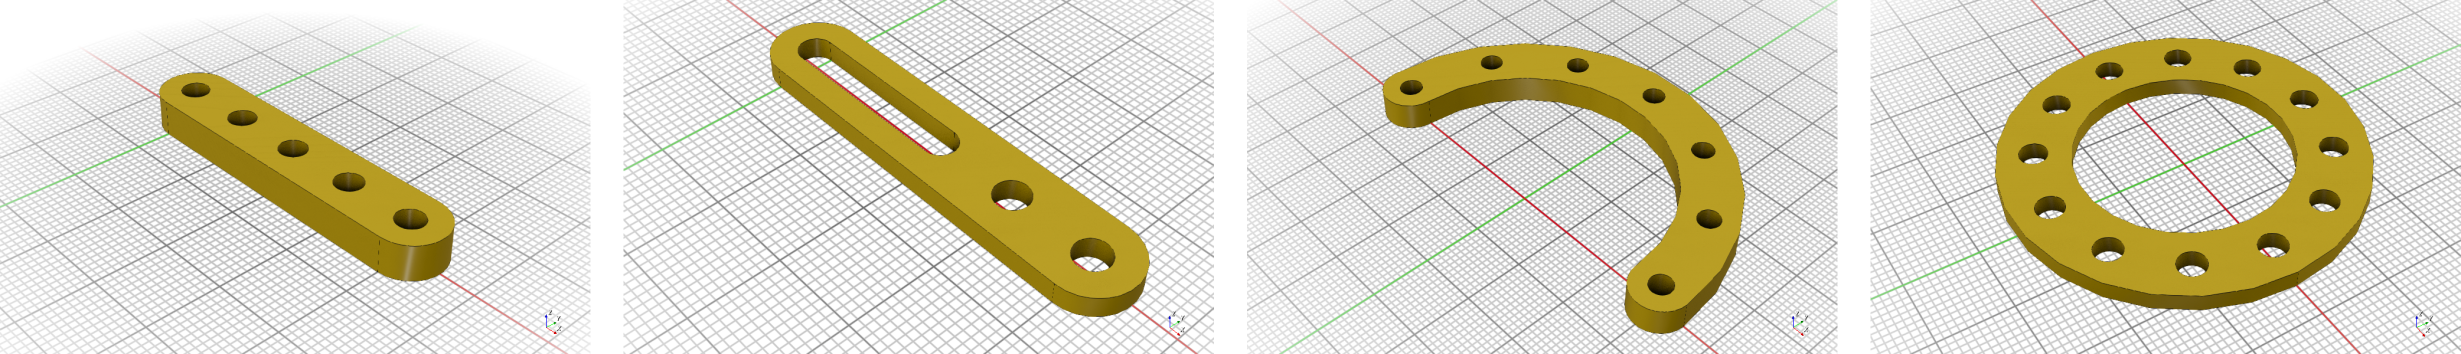

In [2]:
from IPython.display import Image
Image(filename='./img/image_brace.png', width=800)

# <font color='navy'> <i><b> Brace</i></b> </font>

The Brace component is intended for the creation of connecting parts.

    Brace(size, height, holes, center)
    Brace_Arc(radius, angle, height, holes, center)
    Brace_Circle(radius, height, holes, center)


### <font color='teal'> Examples </i></b> </font>

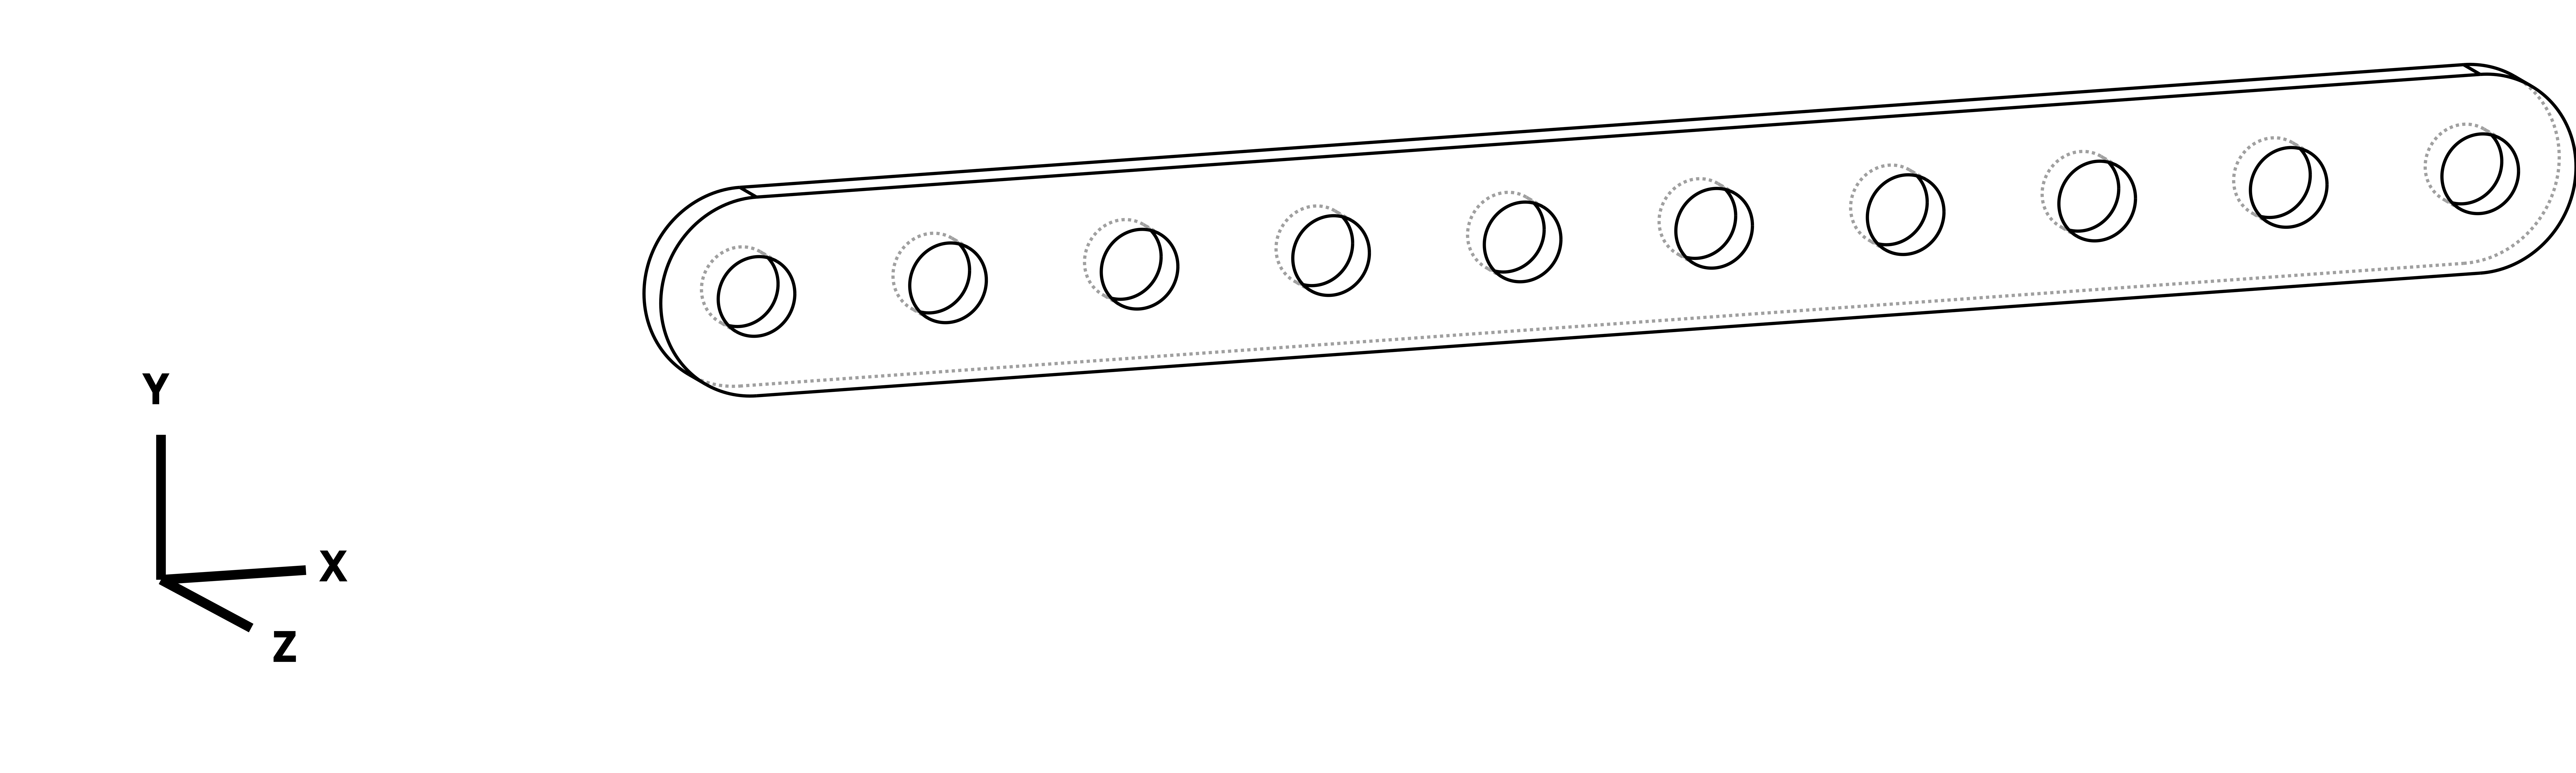

In [12]:
from lib import *

b1 = Brace(10)

convert_to_image(b1,'./img/brace_01')
Image('./img/brace_01.png', width=450)

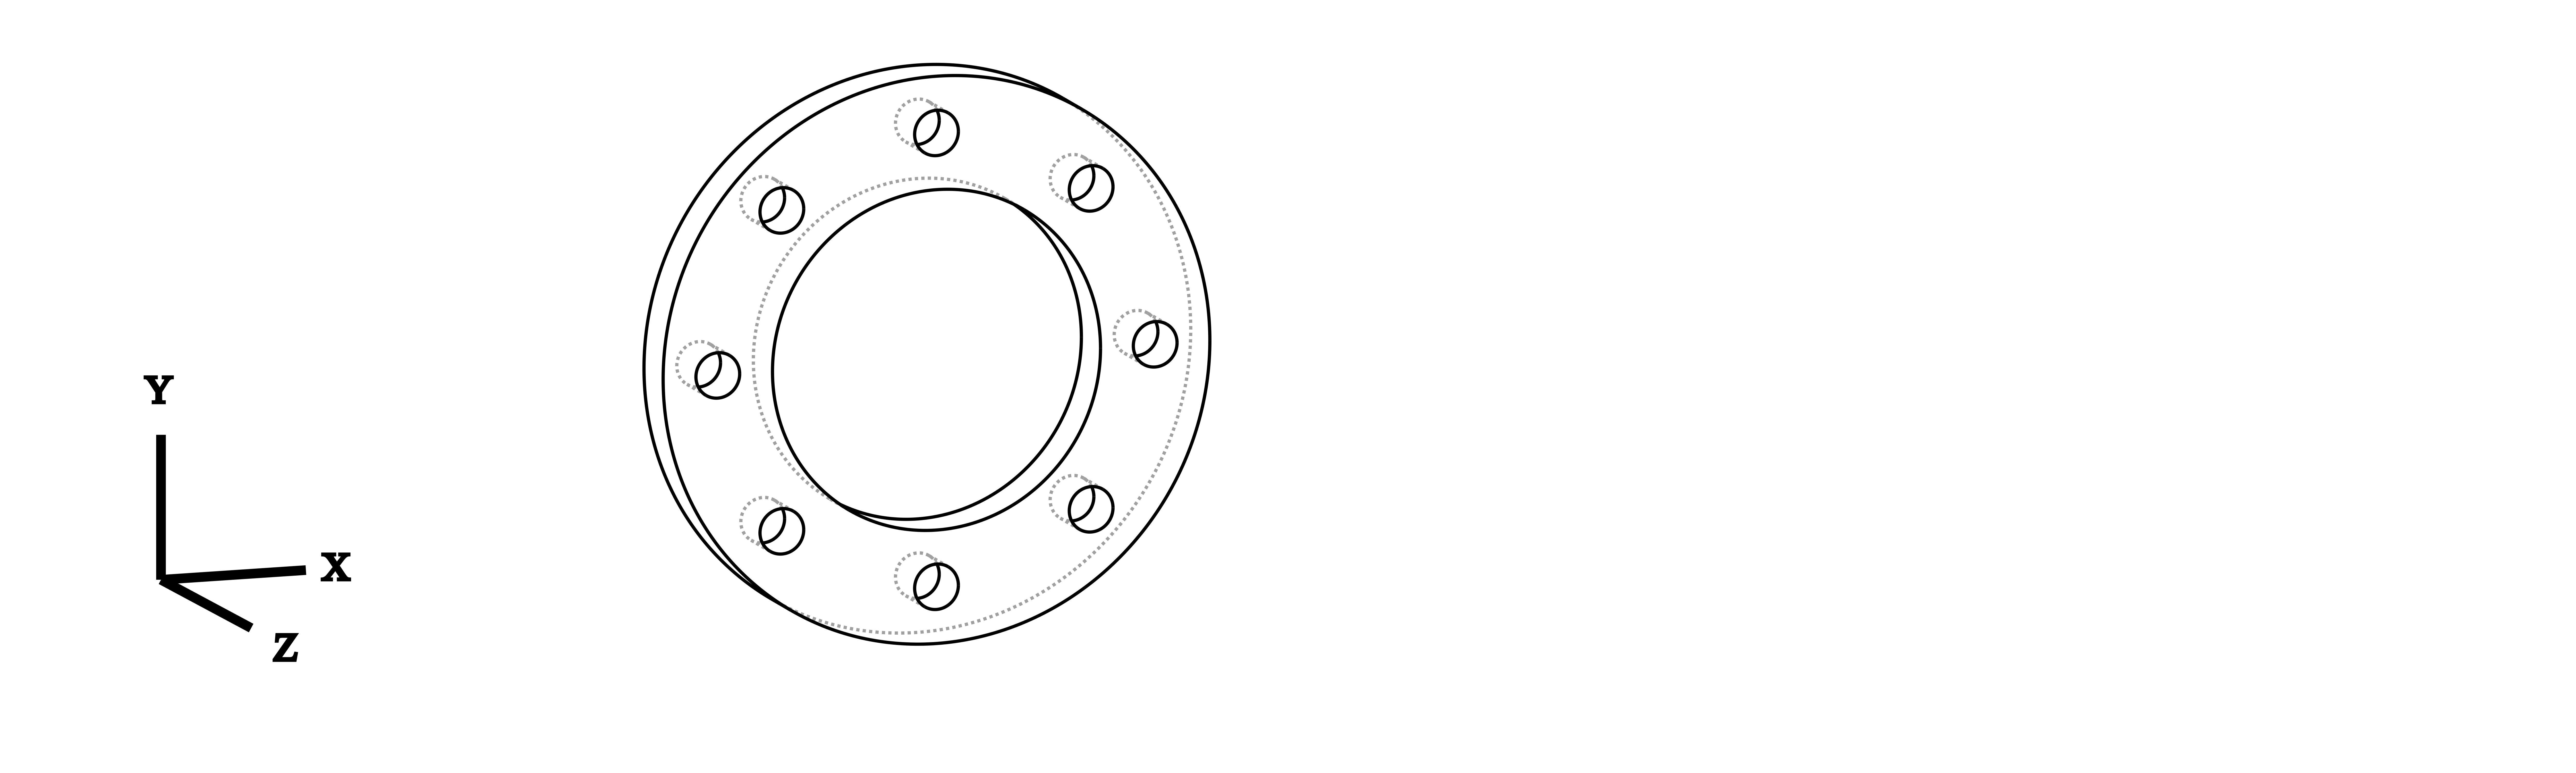

In [5]:
b1 = Brace_Circle(2, 1/2, 8)

convert_to_image(b1,'./img/brace_02')
Image('./img/brace_02.png', width=800)

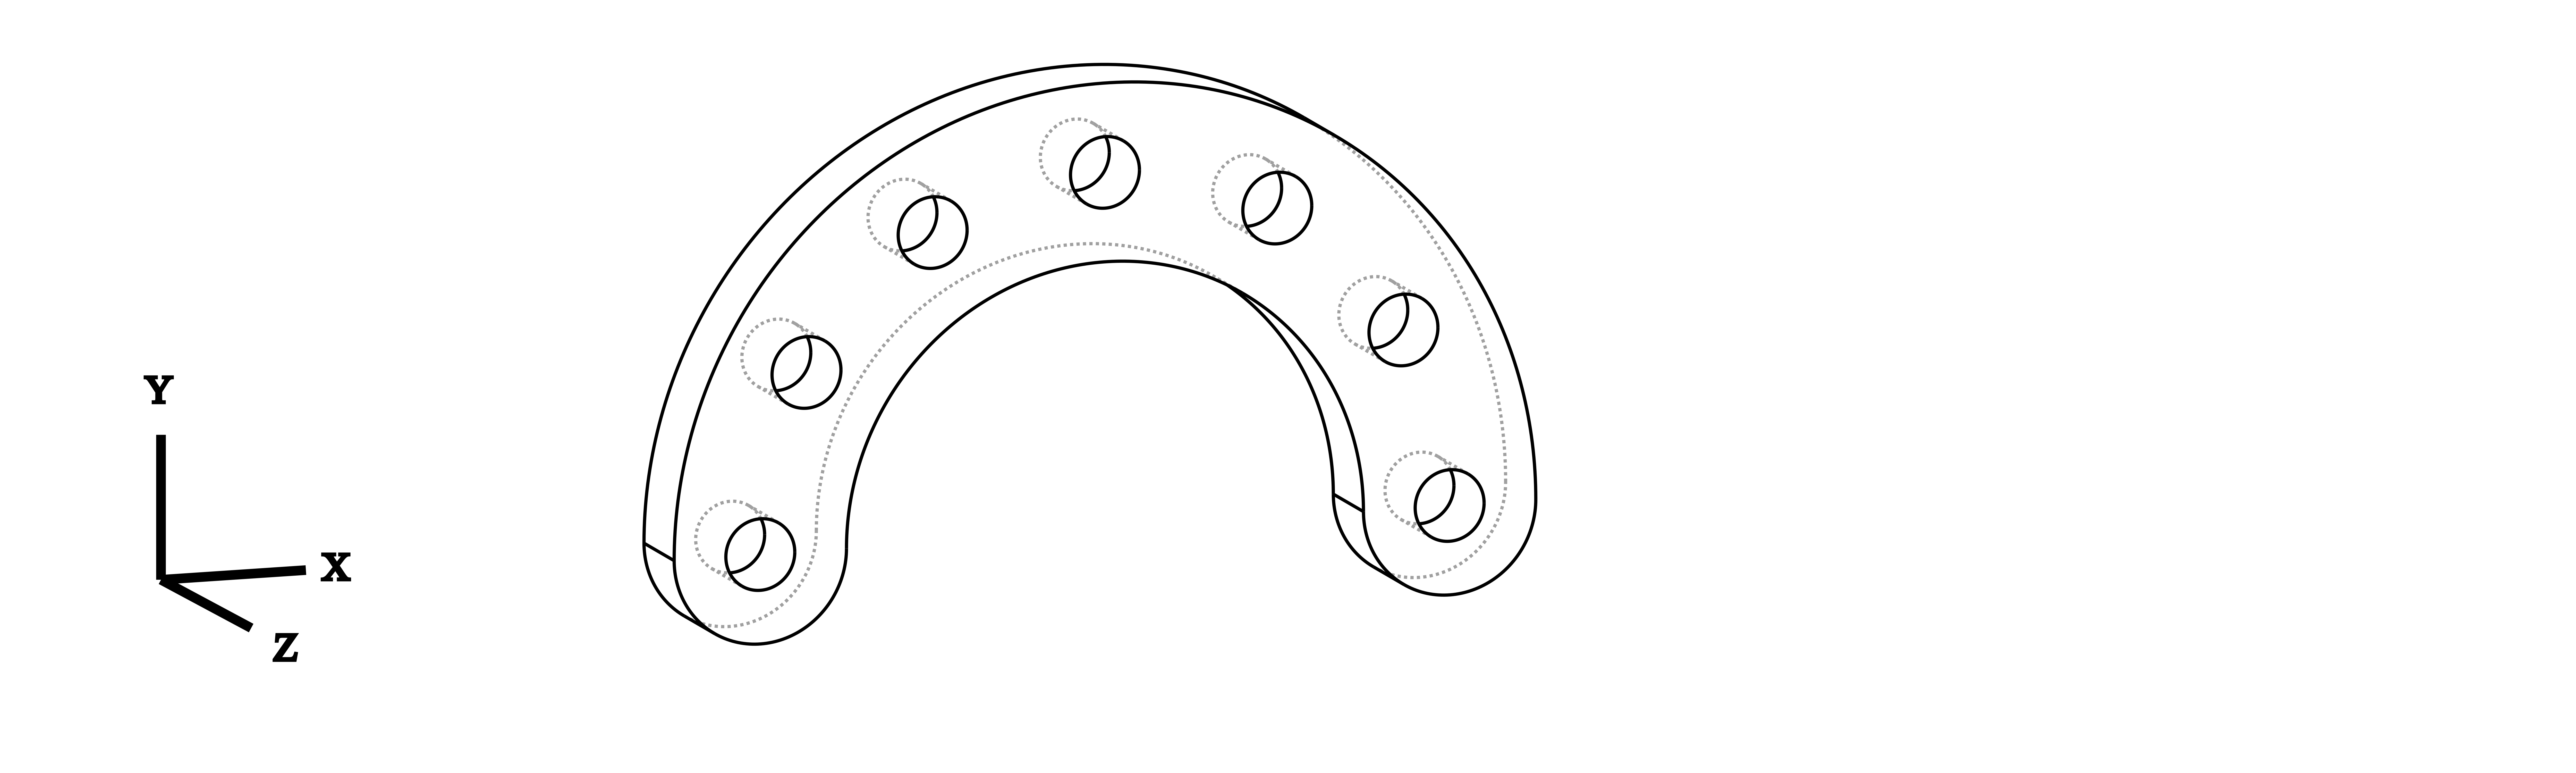

In [7]:
b1 = Brace_Arc(2,180,1/2, 7)

convert_to_image(b1,'./img/brace_03')
Image('./img/brace_03.png', width=600)

### <font color='teal'> <b> Calculation of the arc angle for an Brace_Arc </b></font>

Calculation of the angle for the Brace_Arc so that the end points of the arc are in multiples of BU.

### <font color='purple'> <b> Example </b></font>

* radius = 4 BU
* brace length = 7 BU

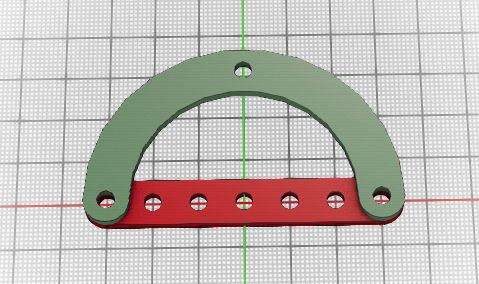

In [2]:
Image(filename='./img/comp_11.png', width=400)

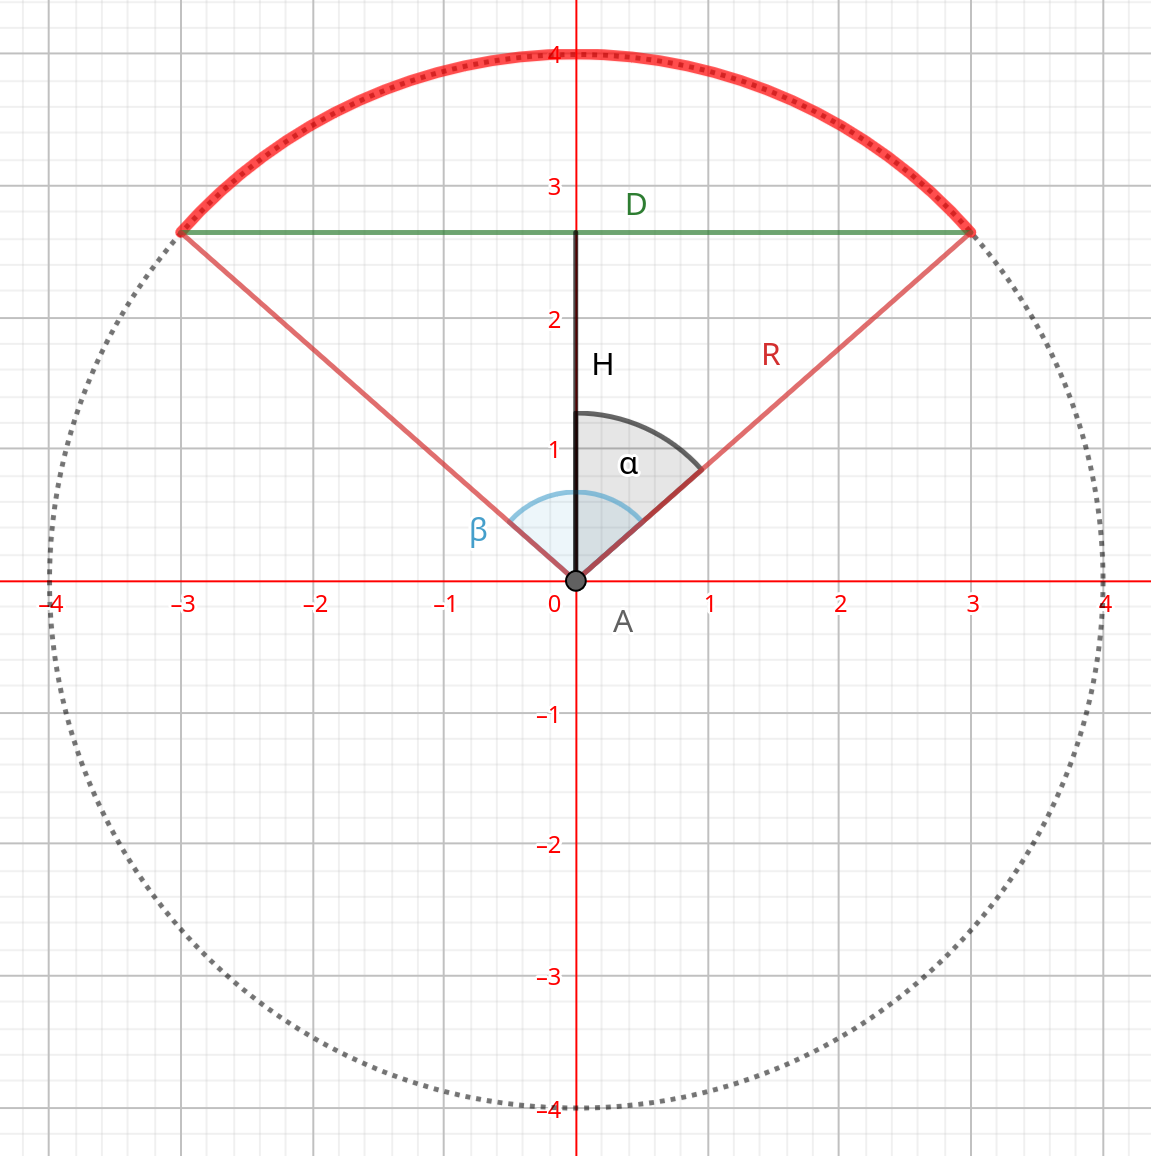

In [10]:
Image(filename='./img/tetiva.png', width=400)

    R    - circle radius, in BU units
    D    - chord length in BU units, D >= 2*R+1

    beta - desired angle
    
\begin{align*}
\beta &= 2 \alpha      \\
\\
\frac{D-1}{2} &= R \cdot \sin(\alpha)    \\
\\
\beta &= 2 \alpha = 2 \cdot \arcsin \Big( \frac{D}{2R} \Big) \\
H &= R \cdot cos(\alpha) \\
\end{align*}

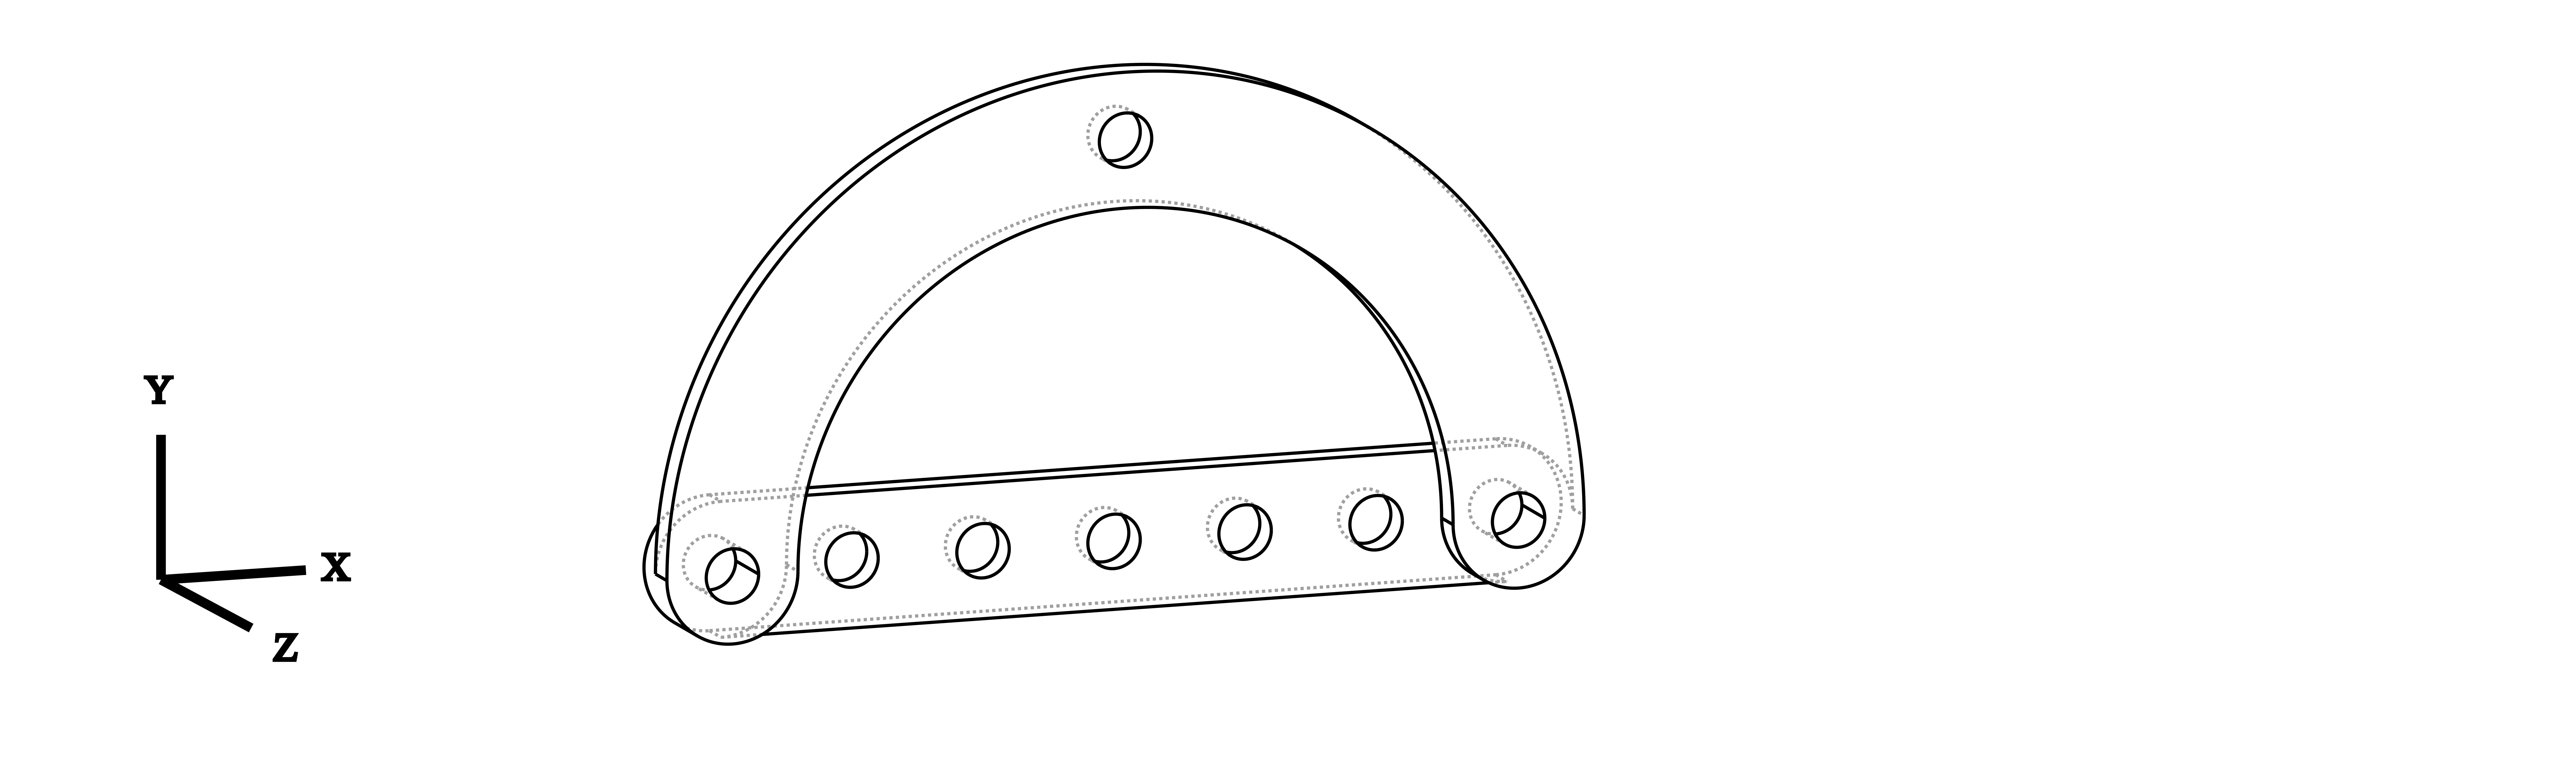

In [1]:
from lib import *
from numpy import arcsin, pi

D = 7   # D >= 2*R+1  dlzka tetivy
R = 3   # arc radius

alpha = arcsin( (D-1) / (2*R ) )
beta = 2*alpha
H = R*cos(alpha)
bdeg = beta/pi*180     # convert rad -> deg

h = R*cos(alpha)
br1 = Brace_Arc(R, bdeg, 1/4, 3, center=True).Rz(90-bdeg/2).BU_T([0, -H, 1/4])
bb4 = Brace(D, center=True)

br1.U(bb4)

convert_to_image(br1,'./img/brace_r02')
Image('./img/brace_r02.png', width=800)